In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [35]:
df = pd.read_excel("Xioami Case.xlsx")

In [36]:
df.head()

,Customer,Day,Browser,No. of Clicks,Pages Viewed,Time (min),Amount Spent (Rs.)
0,1,Monday,Chrome,13,4,8.5,2668.0
1,2,Saturday,Chrome,15,5,16.9,3469.0
2,3,Monday,Internet Explorer,20,6,7.3,5215.0
3,4,Monday,Chrome,42,6,30.1,10423.0
4,5,Saturday,Internet Explorer,20,6,13.3,5404.0


# histogram

In [37]:
# a histogram takes in series of data and divides into number if bins
# when to use histogram 
# to calucalate the count of varaible in plot

Text(0.5, 1.0, 'Information about time spent')

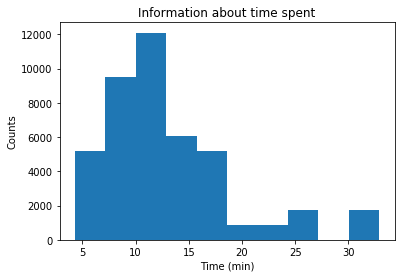

In [38]:
plt.hist(df['Time (min)'],bins=10)
plt.xlabel('Time (min)')
plt.ylabel('Counts')
plt.title('Information about time spent')

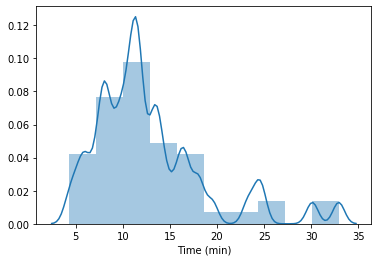

In [39]:
sns.distplot(df['Time (min)'],bins=10)

C:\Users\intel\anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Unrecognized location 'centre right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  after removing the cwd from sys.path.


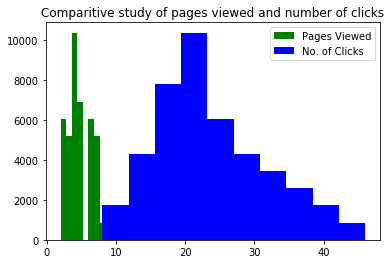

In [40]:
plt.hist(df['Pages Viewed'],bins=10,facecolor='green',label='Pages Viewed')
plt.hist(df['No. of Clicks'],bins=10,facecolor='blue',label='No. of Clicks')
plt.title('Comparitive study of pages viewed and number of clicks')
plt.legend(loc='centre right')
plt.show()

# pie chart

In [41]:
# A pie chart is circular plot which is divided into slices to show numerical proportion
# should be used for discrete values

In [42]:
valcount=pd.DataFrame(df['Day'].value_counts())

In [43]:
valcount

,Day
Friday,9504
Monday,7776
Tuesday,6048
Saturday,6048
Wednesday,5184
Sunday,4320
Thursday,4320


In [44]:
names = ['Friday','Monday','Tuesday','Saturday','Wednesday','Thursday','Sunday']

In [45]:
valcount['names'] = names

In [46]:
valcount

,Day,names
Friday,9504,Friday
Monday,7776,Monday
Tuesday,6048,Tuesday
Saturday,6048,Saturday
Wednesday,5184,Wednesday
Sunday,4320,Thursday
Thursday,4320,Sunday


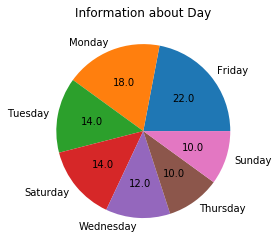

In [47]:
plt.pie(valcount['Day'],labels=valcount['names'],autopct='%.1f')
plt.title('Information about Day')
plt.show()

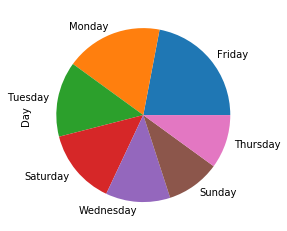

In [48]:
# shot cut method 
df['Day'].value_counts().plot(kind='pie')

In [49]:
# bar plot shows distribution of several groups


In [50]:
test = pd.DataFrame(df['Browser'].value_counts())

In [51]:
test

,Browser
Chrome,23328
Firefox,13824
Internet Explorer,6048


In [52]:
test['Names']=['Chrome', 'Firefox','Internet Explorer']

In [53]:
test

,Browser,Names
Chrome,23328,Chrome
Firefox,13824,Firefox
Internet Explorer,6048,Internet Explorer


<BarContainer object of 3 artists>

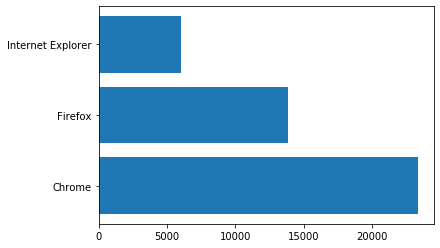

In [54]:
plt.barh(test['Names'],test['Browser'])

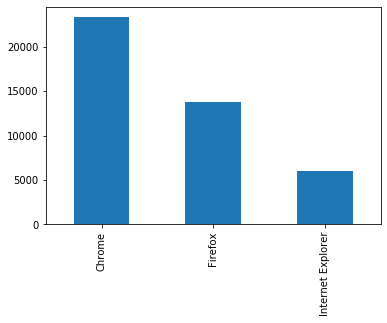

In [55]:
df['Browser'].value_counts().plot(kind='bar')

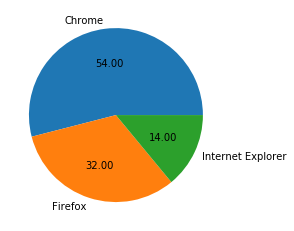

In [56]:
plt.pie(test['Browser'],labels=test['Names'],autopct='%.2f')
plt.show()

In [57]:
# Box plot 
# Box plot gives a summary of data and help us in understanding the distribution in a better way
# it is used to understand the overall stastical distribution of the data


{'whiskers': [<matplotlib.lines.Line2D at 0x1b6356b2f48>,
 'caps': [<matplotlib.lines.Line2D at 0x1b6356b4a08>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1b6356b2988>],
 'medians': [<matplotlib.lines.Line2D at 0x1b6356b6b48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b6356bab48>],
 'means': []}

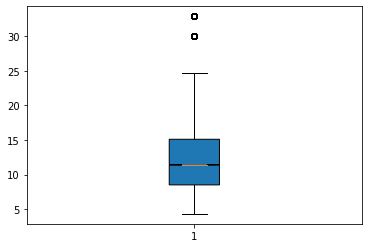

In [58]:
plt.boxplot(df["Time (min)"],patch_artist=True,notch=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1b630ec9648>,
 'caps': [<matplotlib.lines.Line2D at 0x1b630eb9848>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1b630ec9088>],
 'medians': [<matplotlib.lines.Line2D at 0x1b630ea17c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b630ea1f88>],
 'means': []}

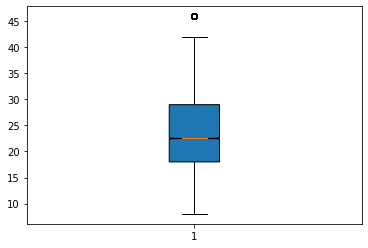

In [59]:
plt.boxplot(df['No. of Clicks'],patch_artist=True,notch=True)

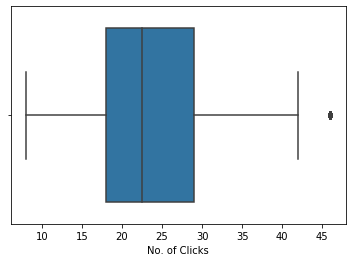

In [60]:
sns.boxplot(df['No. of Clicks'])

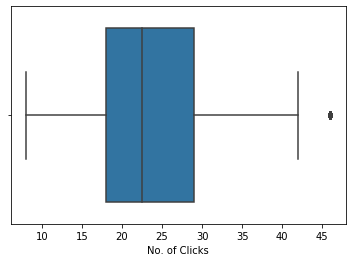

In [61]:
sns.boxplot(df['No. of Clicks'],orient='h')

In [62]:
# scatter plot 
# it is used to visualize two numerical variables basically to understand the relationship between them

In [63]:
plt.scatter(df['Time (min)'],df['No. of Clicks'])
plt.xlabel[]

SyntaxError: invalid syntax (<ipython-input-63-ee48b6e46dda>, line 2)

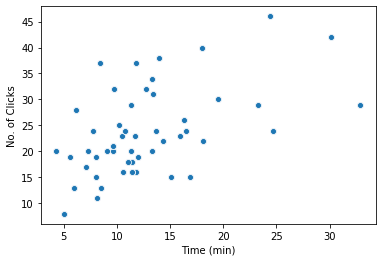

In [64]:
sns.scatterplot(df['Time (min)'],df['No. of Clicks'])

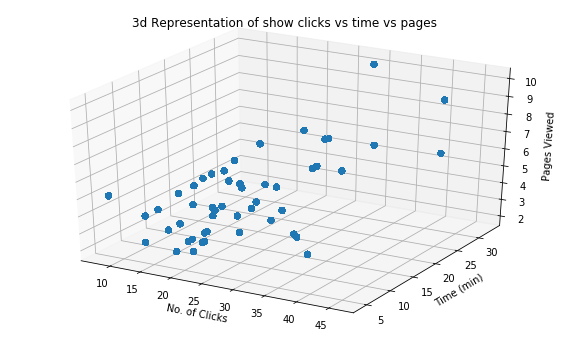

In [65]:
fig = plt.figure(figsize=(10,6))
axis = fig.add_subplot(111,projection='3d')
axis.scatter(df["No. of Clicks"],df['Time (min)'],df['Pages Viewed'],s=30)
axis.set_xlabel('No. of Clicks')
axis.set_ylabel('Time (min)')
axis.set_zlabel('Pages Viewed')
plt.title('3d Representation of show clicks vs time vs pages ')
plt.show()
                                

In [66]:
corr = df.corr()

In [67]:
corr

,Customer,No. of Clicks,Pages Viewed,Time (min),Amount Spent (Rs.)
Customer,1.000000,0.002474,0.000821,-0.001407,0.002682
No. of Clicks,0.002474,1.000000,0.566934,0.516365,0.903248
Pages Viewed,0.000821,0.566934,1.000000,0.595568,0.723667
Time (min),-0.001407,0.516365,0.595568,1.000000,0.580048
Amount Spent (Rs.),0.002682,0.903248,0.723667,0.580048,1.000000


# heat map

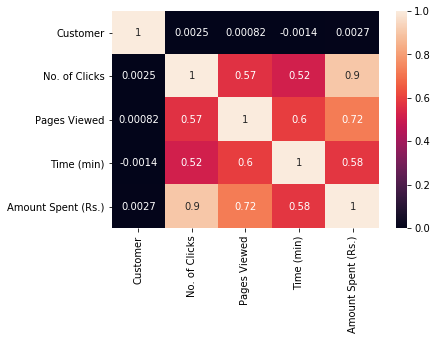

In [68]:
sns.heatmap(corr,annot=True)

In [69]:
# heat map is graphical representation which helps us to visualize correlation

In [70]:
df.head()

,Customer,Day,Browser,No. of Clicks,Pages Viewed,Time (min),Amount Spent (Rs.)
0,1,Monday,Chrome,13,4,8.5,2668.0
1,2,Saturday,Chrome,15,5,16.9,3469.0
2,3,Monday,Internet Explorer,20,6,7.3,5215.0
3,4,Monday,Chrome,42,6,30.1,10423.0
4,5,Saturday,Internet Explorer,20,6,13.3,5404.0


In [71]:
le = LabelEncoder()

In [72]:
df['Day'] = le.fit_transform(df['Day'])

In [73]:
df['Browser'] = le.fit_transform(df['Browser'])

In [74]:
df.head()

,Customer,Day,Browser,No. of Clicks,Pages Viewed,Time (min),Amount Spent (Rs.)
0,1,1,0,13,4,8.5,2668.0
1,2,2,0,15,5,16.9,3469.0
2,3,1,2,20,6,7.3,5215.0
3,4,1,0,42,6,30.1,10423.0
4,5,2,2,20,6,13.3,5404.0


In [75]:
df.drop('Customer',axis=1,inplace=True)

In [76]:
y = df['Amount Spent (Rs.)']

In [77]:
y

0         2668.0
1         3469.0
2         5215.0
3        10423.0
4         5404.0
          ...   
43195     9875.0
43196     2668.0
43197    15530.0
43198     5215.0
43199     6627.0
Name: Amount Spent (Rs.), Length: 43200, dtype: float64

In [78]:
x= df.drop('Amount Spent (Rs.)',axis=1)

In [79]:
x

,Day,Browser,No. of Clicks,Pages Viewed,Time (min)
0,1,0,13,4,8.5
1,2,0,15,5,16.9
2,1,2,20,6,7.3
3,1,0,42,6,30.1
4,2,2,20,6,13.3
...,...,...,...,...,...
43195,0,0,31,3,13.4
43196,1,0,13,4,8.5
43197,0,1,29,10,32.9
43198,1,2,20,6,7.3


In [80]:
x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size=0.3,random_state=0)

In [81]:
lr= LinearRegression()
dt= DecisionTreeRegressor()


In [83]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [84]:
dt.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [85]:
pred = lr.predict(x_test)

In [86]:
pered2 = dt.predict(x_test)

In [87]:
r2_score(y_test,pred)

0.8850778549083614

In [89]:
r2_score(y_test,pered2)

1.0